## 검색 컨텐츠 개선
_사용자가 입력한 단어를 중심으로 유사한 키워드를 찾아내고, 검색 결과에 반영한다._

---
### 성균관대학교 공지사항 '입학' 카테고리 본문 크롤링

In [9]:
import pandas as pd
from tqdm import tqdm
from warnings import filterwarnings

from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup as bs

filterwarnings('ignore')

In [10]:
CHROME_DIR = '/Users/youngerous/young/bin/chromedriver'

options = webdriver.ChromeOptions()
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; InteSl Mac O X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36')
options.add_argument('headless')

browser = webdriver.Chrome(CHROME_DIR, chrome_options=options)
browser.implicitly_wait(5)

In [11]:
text = [] # 크롤링한 본문을 담을 리스트

In [12]:
# '입학' 카테고리 전체 항목(17) 크롤링
for page in tqdm(range(0, 170, 10)):
    browser.get('https://www.skku.edu/skku/campus/skk_comm/notice03.do?mode=list&&articleLimit=10&article.offset='+str(page))

    sleep(1)
    for idx in range(1,10):
        try:
            title = browser.find_element_by_css_selector('#jwxe_main_content > div > div > div.container > div.board-wrap.board-qa.table_scrollWrap > table > tbody > tr:nth-child({}) > td.left > a'.format(idx)) # 10개의 title이 저장된다.
            detail_page = title.get_attribute('href')

            # 새 탭 띄워서 이동
            browser.execute_script("window.open('');")
            sleep(0.5)
            browser.switch_to_window(browser.window_handles[1])
            browser.get(detail_page)
            sleep(1)

            # 본문 크롤링하기 (BeautifulSoup)
            soup = bs(browser.page_source, 'lxml')
            content = ''
            sleep(1)

            content = soup.find('pre', {'class':'pre'})
            if content == None:
                content = soup.find('div', {'class':'fr-view'})

            text.append(content.text)

            # 작업 후 새 탭 닫고 기존 탭으로 전환
            sleep(1)
            browser.close()
            browser.switch_to_window(browser.window_handles[0])
        except:
            print('마지막 게시물입니다.')
        
browser.quit()




  0%|          | 0/17 [00:00<?, ?it/s]


  6%|▌         | 1/17 [00:40<10:40, 40.05s/it]


 12%|█▏        | 2/17 [01:18<09:52, 39.48s/it]


 18%|█▊        | 3/17 [01:56<09:06, 39.07s/it]


 24%|██▎       | 4/17 [02:33<08:21, 38.56s/it]


 29%|██▉       | 5/17 [03:10<07:37, 38.11s/it]


 35%|███▌      | 6/17 [03:48<06:57, 37.94s/it]


 41%|████      | 7/17 [04:25<06:15, 37.58s/it]


 47%|████▋     | 8/17 [05:02<05:38, 37.60s/it]


 53%|█████▎    | 9/17 [05:39<04:59, 37.46s/it]


 59%|█████▉    | 10/17 [06:17<04:22, 37.44s/it]


 65%|██████▍   | 11/17 [06:55<03:46, 37.67s/it]


 71%|███████   | 12/17 [07:32<03:07, 37.58s/it]


 76%|███████▋  | 13/17 [08:10<02:30, 37.65s/it]


 82%|████████▏ | 14/17 [08:47<01:52, 37.40s/it]


 88%|████████▊ | 15/17 [09:25<01:14, 37.48s/it]


 94%|█████████▍| 16/17 [10:04<00:37, 37.93s/it]


100%|██████████| 17/17 [10:42<00:00, 38.05s/it]

마지막 게시물입니다.


In [13]:
# 데이터 확인
print(text[0])

2020 전기 외국인 대학원 진학설명회 9/17(화) 오후 6시 개최성균관대학교 2020 전기 대학원 외국인 특별전형 입학설명회를 아래와 같이 실시하고 대학원 입시에 대한 실질적인 정보를 제공하오니, 대학원 입학에 관심있는 학사과정 재학생 여러분의 많은 참여 바랍니다.- 일  시: 2019. 9. 17(화) 오후 6시부터 8시까지- 장  소: 성균관대학교 인문사회과학캠퍼스 국제관 지하2층 9B217 (서울 종로구 혜화동 소재)- 찾아오시는 길 :  https://www.skku.edu/skku/about/campusInfo/campusMap.do#※신청인원에 따라 장소 변경 가능- 행사 주요내용: 학교 소개, 장학제도, 학생지원, 최근 입시현황, 원서접수, 질의 응답, 학과별 상담※주요학과 대학원 재학생 경험 공유 및 질의 응답 예정- 진행언어: 한국어(중국어, 영어 Q&A 가능)- 참가신청: 온라인 사전신청 https://docs.google.com/forms/d/e/1FAIpQLSfd2L1bI7RCKh1Zg19uYxB3lLGB-0mHtcngkbvuCvUz78SVTA/viewform- 문의: 외국인유학생지원팀(psj980@skku.edu, 02-760-0021)


---
### 전처리

1. **글 내부 \n, \xa0 문자 제거 후, 각 글은 \n으로 구분**

In [24]:
for idx in range(len(text)):
    text[idx] = text[idx].replace('\n', ' ')
    text[idx] = text[idx].replace('\xa0', ' ')

document = "\n".join(text)
document[:300]

'2020 전기 외국인 대학원 진학설명회 9/17(화) 오후 6시 개최성균관대학교 2020 전기 대학원 외국인 특별전형 입학설명회를 아래와 같이 실시하고 대학원 입시에 대한 실질적인 정보를 제공하오니, 대학원 입학에 관심있는 학사과정 재학생 여러분의 많은 참여 바랍니다.- 일  시: 2019. 9. 17(화) 오후 6시부터 8시까지- 장  소: 성균관대학교 인문사회과학캠퍼스 국제관 지하2층 9B217 (서울 종로구 혜화동 소재)- 찾아오시는 길 :  https://www.skku.edu/skku/about/campusInfo/camp'

2. **특수문자 제거**

In [47]:
import re

document = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'□▶■★‣☎▣◇○*◎…》]', ' ', document)
document[:300]

'2020 전기 외국인 대학원 진학설명회 9 17 화 오후 6시 개최성균관대학교 2020 전기 대학원 외국인 특별전형 입학설명회를 아래와 같이 실시하고 대학원 입시에 대한 실질적인 정보를 제공하오니 대학원 입학에 관심있는 학사과정 재학생 여러분의 많은 참여 바랍니다 일 시 2019 9 17 화 오후 6시부터 8시까지 장 소 성균관대학교 인문사회과학캠퍼스 국제관 지하2층 9B217 서울 종로구 혜화동 소재 찾아오시는 길 https www skku edu skku about campusInfo campusMap do 신청인원에 따라 장소'

3. **불필요한 공백 축소**

In [48]:
document = ' '.join(document.split())
document[:300]

'2020 전기 외국인 대학원 진학설명회 9 17 화 오후 6시 개최성균관대학교 2020 전기 대학원 외국인 특별전형 입학설명회를 아래와 같이 실시하고 대학원 입시에 대한 실질적인 정보를 제공하오니 대학원 입학에 관심있는 학사과정 재학생 여러분의 많은 참여 바랍니다 일 시 2019 9 17 화 오후 6시부터 8시까지 장 소 성균관대학교 인문사회과학캠퍼스 국제관 지하2층 9B217 서울 종로구 혜화동 소재 찾아오시는 길 https www skku edu skku about campusInfo campusMap do 신청인원에 따라 장소'

In [96]:
len(document)

88044

---
### 임베딩

In [28]:
from konlpy.tag import *

In [29]:
twitter = Okt()

### Tokenize

In [72]:
def make_corpus(txt):
    corpus = []
    for each in txt.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(each)])
    return corpus

# 학습 방해 요소 제거
def make_corpus_rm_stopwords(txt):
    corpus = []
    stopwords = ['Josa', 'Number', 'Alpha', 'Adverb', 'Punctuation']
    for each in txt.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(each) if p[1] not in stopwords]) 
    return corpus

In [73]:
corpus = make_corpus(document)
corpus = make_corpus_rm_stopwords(document)
print(corpus[0][:20])

['전기/Noun', '외국인/Noun', '대학원/Noun', '진학/Noun', '설명/Noun', '회/Noun', '화/Noun', '오후/Noun', '개최/Noun', '성균관대/Noun', '학교/Noun', '전기/Noun', '대학원/Noun', '외국인/Noun', '특별/Noun', '전형/Noun', '입학/Noun', '설명/Noun', '회/Noun', '아래/Noun']


---
### Train

In [74]:
from gensim.models import Word2Vec, fasttext

> #### FastText 모델 사용
사용자의 검색 단어가 학습 데이터에 없는 경우가 있기 때문에 <br/>
이를 보완하기 위해 FastText 모델을 사용하였다. <br/>
그리고 성능 비교를 위해 CBOW, Skip-Gram 모델을 모두 생성하였다.


#### 1. FastText - CBOW

In [75]:
FT_CB_model = fasttext.FastText(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=0)

In [76]:
words_CB = FT_CB_model.wv.index2word
words_CB[:10]

['대학원/Noun',
 '접수/Noun',
 '과정/Noun',
 '학과/Noun',
 '및/Noun',
 '지원/Noun',
 '성균관대/Noun',
 '모집/Noun',
 '학생/Noun',
 '수/Noun']

In [77]:
vectors_CB = FT_CB_model.wv.vectors
vectors_CB[0]

array([-0.78349084, -0.1040215 ], dtype=float32)

In [78]:
# 토큰과 벡터 zip
FT_CB_model_result = dict(zip(words_CB, vectors_CB))

In [93]:
# 코사인 유사도를 기반으로 한 유사 단어
FT_CB_model.most_similar('데이터사이언스/Noun', topn=10)

[('다중/Noun', 0.9999998807907104),
 ('문화/Noun', 0.9999993443489075),
 ('성취/Noun', 0.9999961256980896),
 ('도입/Noun', 0.9999550580978394),
 ('종합/Noun', 0.9999338388442993),
 ('주민/Noun', 0.999923586845398),
 ('계제/Noun', 0.9999015927314758),
 ('수/Modifier', 0.9998920559883118),
 ('실험/Noun', 0.9998812675476074),
 ('상반기/Noun', 0.9998388290405273)]

In [100]:
import pandas as pd
w2v_df = pd.DataFrame(vectors_CB, columns = ['x1', 'x2'])
w2v_df['word'] = words_CB
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df[:10]

,word,x1,x2
0,대학원/Noun,-0.783491,-0.104022
1,접수/Noun,-2.507232,-3.848997
2,과정/Noun,-0.614071,0.660678
3,학과/Noun,-0.551275,-0.102193
4,및/Noun,-0.425967,-0.185588
5,지원/Noun,-0.573162,0.043944
6,성균관대/Noun,-0.624872,-0.518979
7,모집/Noun,-0.688307,-0.238017
8,학생/Noun,-0.607689,1.215501
9,수/Noun,-1.307391,-1.754238


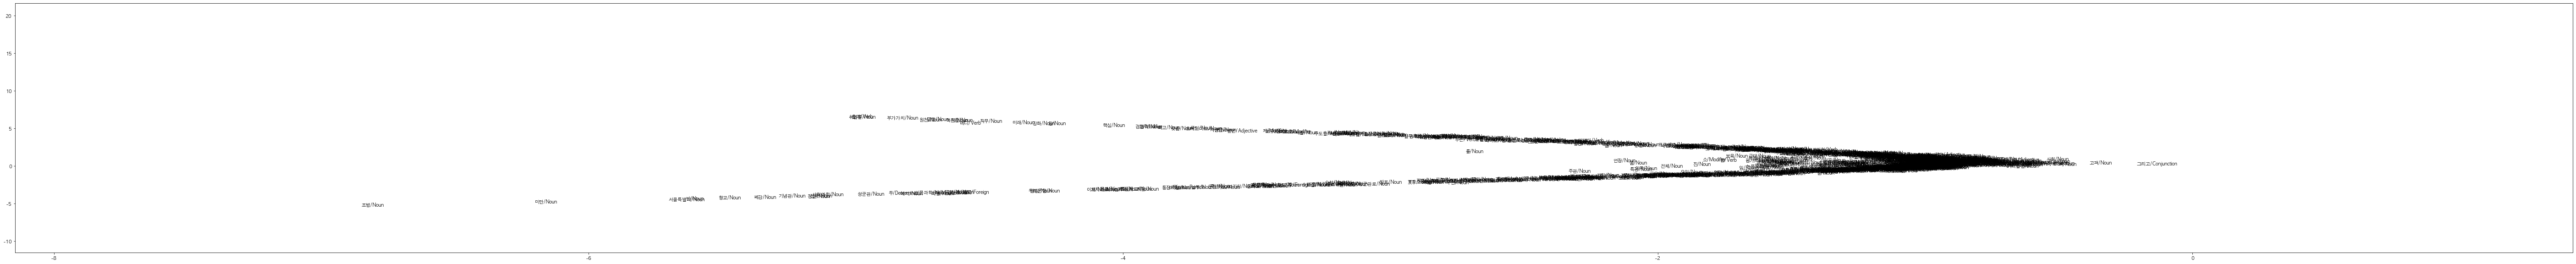

In [89]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()
fig.set_size_inches(100,10)

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors_CB, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors_CB, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors_CB, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors_CB, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

#### 2. FastText - SkipGram

In [82]:
FT_SG_model = fasttext.FastText(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=1)


In [83]:
words_SG = FT_SG_model.wv.index2word
words_SG[:10]

['대학원/Noun',
 '접수/Noun',
 '과정/Noun',
 '학과/Noun',
 '및/Noun',
 '지원/Noun',
 '성균관대/Noun',
 '모집/Noun',
 '학생/Noun',
 '수/Noun']

In [84]:
vectors_SG = FT_SG_model.wv.vectors
vectors_SG[0]

array([-1.0304481 ,  0.12198096], dtype=float32)

In [85]:
# 토큰과 벡터 zip
FT_SG_model_result = dict(zip(words_SG, vectors_SG))

In [94]:
# 코사인 유사도를 기반으로 한 유사 단어
FT_SG_model.most_similar('데이터사이언스/Noun', topn=10)

[('마친/Verb', 0.8459667563438416),
 ('되었다/Verb', 0.8434221148490906),
 ('관리/Noun', 0.8361315727233887),
 ('실험/Noun', 0.8345774412155151),
 ('유통/Noun', 0.8339622616767883),
 ('웨어/Noun', 0.8338406682014465),
 ('국가/Noun', 0.8337240815162659),
 ('기획/Noun', 0.8331588506698608),
 ('연구소/Noun', 0.8331077694892883),
 ('틱/Suffix', 0.832846999168396)]

In [99]:
import pandas as pd
w2v_df = pd.DataFrame(vectors_SG, columns = ['x1', 'x2'])
w2v_df['word'] = words_SG
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df[:10]

,word,x1,x2
0,대학원/Noun,-1.030448,0.121981
1,접수/Noun,-1.929379,-1.426147
2,과정/Noun,-0.896874,0.257175
3,학과/Noun,-0.879840,0.210412
4,및/Noun,-0.766877,-0.008497
5,지원/Noun,-0.900839,-0.023549
6,성균관대/Noun,-1.113346,-0.609683
7,모집/Noun,-0.976348,-0.056249
8,학생/Noun,-0.941878,0.380095
9,수/Noun,-1.185932,-0.586415


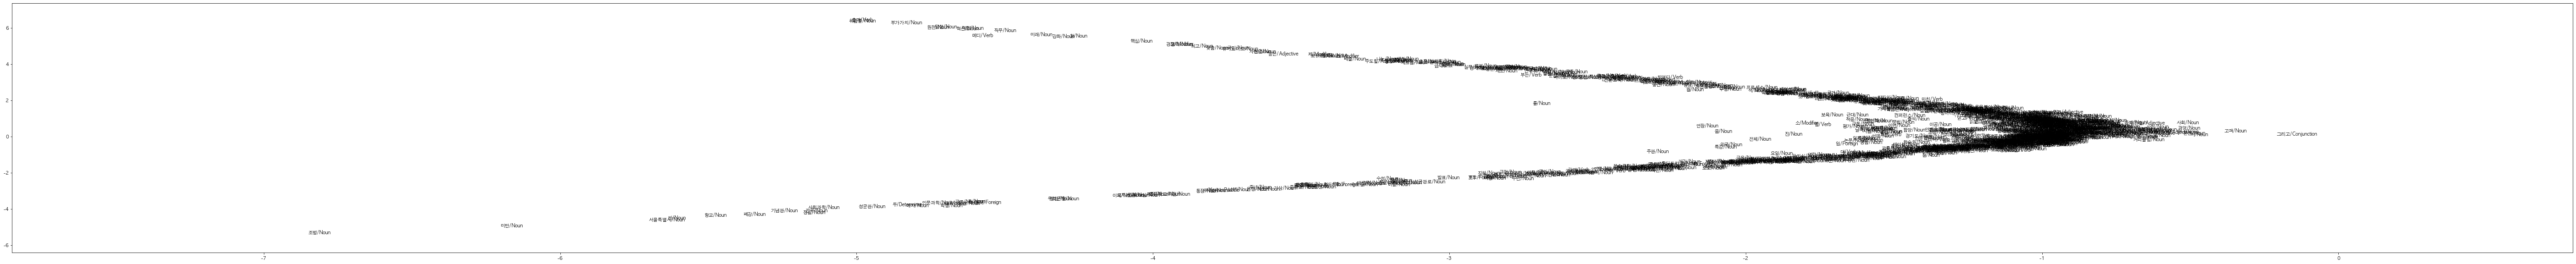

In [88]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()
fig.set_size_inches(100,10)

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors_SG, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors_SG, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors_SG, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors_SG, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

### 의의
본 과제의 의도한 input은 사용자의 검색 키워드(명사형)이고, output은 most_similar 함수에 나타난 결과이다.


그러나 사용된 데이터로는 체감상 쓸 만한 결과를 얻지 못하였다. <br/>

#### 한계점
- 수집한 데이터의 질이 좋지 못하다. 불필요한 단어들이 학습을 저해한 듯 하다.
> - 공지사항에 포함된 내용에는 핵심 키워드와 관련없는 내용이 많았다. <br/>
    (예: 10줄의 내용 중 키워드에 관련된 내용은 2~3줄인 경우)
  - 반복적으로 언급되는 단어들이 불필요한 경우가 많았다. <br/>
      (예: 많은 참여 부탁, 간식, 전화번호, 이메일 등)

- 개별 단어 임베딩의 한계 (두 개 이상의 단어가 조합되었을 때를 고려하기 어려움)

---
#### 발전 방향 (검색 포털 서비스)
- 사용자가 특정 단어 검색 시 유사한 키워드까지 포함된 컨텐츠를 **우선적으로** 제안
- 더 나은 사용자 검색 경험을 제공
- 학교 공지사항이 아니라 학생들이 자유롭게 의견을 표현하는 커뮤니티 서비스에서 사용되는 문장을 학습하면 더 좋은 모델이 나올 것으로 예상


